In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("data/wfp_food_prices_sdn.csv", parse_dates=['date'])

In [33]:
print(data.head())

        date     admin1            admin2      market  latitude  longitude  \
0 2001-01-15  Blue Nile           Damazin     Damazin   11.7891    34.3592   
1 2001-01-15    Gedaref  Al Gedaref Rural  El Gedarif   14.0400    35.3800   
2 2001-01-15   Khartoum       Jebal Aulya    Khartoum   15.5126    32.5436   
3 2001-01-15   Khartoum       Jebal Aulya    Khartoum   15.5126    32.5436   
4 2001-01-15   Khartoum       Jebal Aulya    Khartoum   15.5126    32.5436   

             category        commodity   unit priceflag  pricetype currency  \
0  cereals and tubers  Sorghum (white)  90 KG    actual  Wholesale      SDG   
1  cereals and tubers  Sorghum (white)  90 KG    actual  Wholesale      SDG   
2  cereals and tubers           Millet  90 KG    actual  Wholesale      SDG   
3  cereals and tubers  Sorghum (white)  90 KG    actual  Wholesale      SDG   
4  cereals and tubers            Wheat  90 KG    actual  Wholesale      SDG   

   price  usdprice  
0  46.00   17.8728  
1  51.67   20.

In [34]:
print(data.describe())

           latitude     longitude         price      usdprice
count  11233.000000  11233.000000  11233.000000  11233.000000
mean      13.828219     29.882784    860.720202     20.812684
std        2.548082      4.654956   3770.532831     31.283696
min       11.016667     22.450000      0.000000      0.000000
25%       11.789100     25.350000      3.980000      1.232600
50%       13.188310     30.218580     39.000000      2.507000
75%       15.457000     34.359200    264.000000     37.575000
max       19.615833     37.216389  60000.000000    281.238600


In [35]:
print(data['category'].unique())
print(data['commodity'].unique())
print(data['unit'].unique())

['cereals and tubers' 'non-food']
['Sorghum (white)' 'Millet' 'Wheat' 'Sorghum' 'Sorghum (food aid)'
 'Exchange rate (unofficial)']
['90 KG' '3.5 KG' '3 KG' 'USD/LCU']


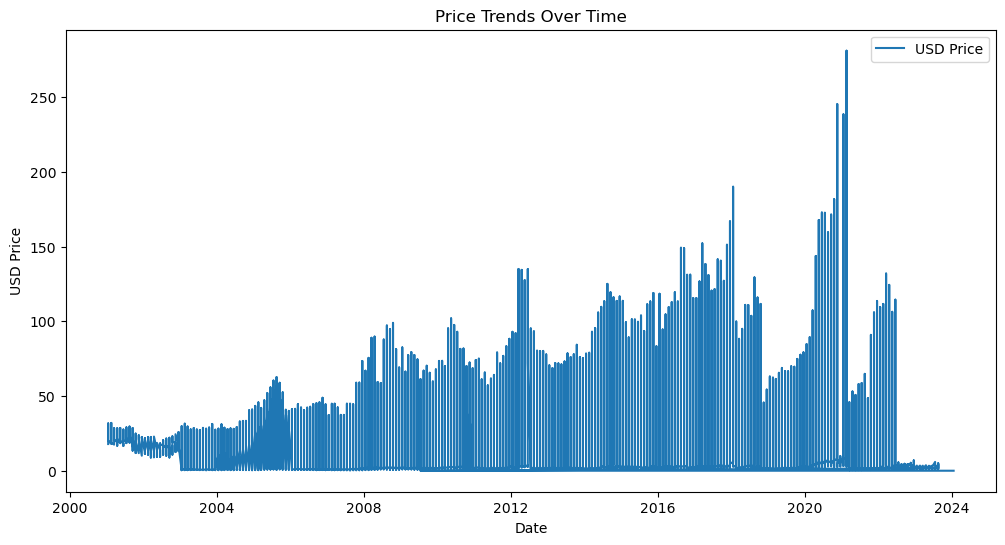

In [36]:
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime format
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['usdprice'], label='USD Price')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.show()

In [37]:
data = pd.read_csv("data/food_crises_cleaned.csv", parse_dates=['date'])

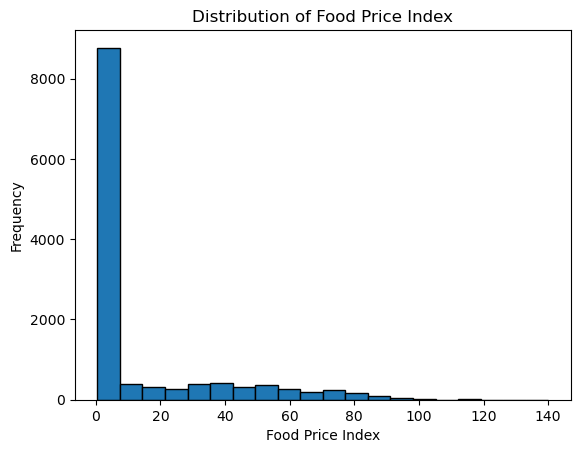

In [38]:
# Histogram of Food Price Index
plt.hist(data['food_price_idx'], bins=20, edgecolor='k')
plt.xlabel('Food Price Index')
plt.ylabel('Frequency')
plt.title('Distribution of Food Price Index')
plt.show()

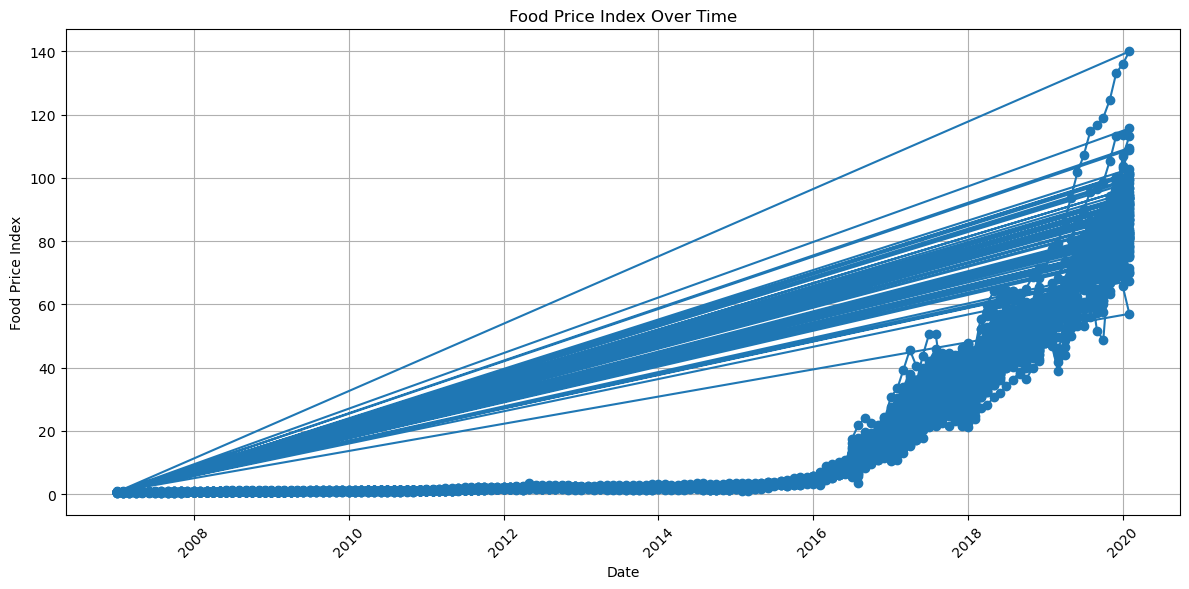

In [39]:
# Time Series Plot of Food Price Index
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['food_price_idx'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Food Price Index')
plt.title('Food Price Index Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the datasets
food_crises = pd.read_csv('data/food_crises_cleaned.csv')
wfp_food_prices = pd.read_csv('data/wfp_food_prices_sdn.csv')

# Merge the datasets based on common columns (e.g., admin1, admin2)
merged_data = pd.merge(food_crises, wfp_food_prices, on=['admin1', 'admin2'])

# Create a GeoDataFrame from the merged data
gdf = gpd.GeoDataFrame(
    merged_data, 
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude)
)

# Plot food prices on the map by region
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)  # Adjust marker style and color as needed

# Add a legend or color bar for food prices

# Show the plot
plt.title('Food Prices on Map by Region')
plt.show()

KeyError: 'admin1'

In [47]:
print("Columns in food_crises:")
print(food_crises.columns)

print("\nColumns in wfp_food_prices:")
print(wfp_food_prices.columns)

Columns in food_crises:
Index(['country', 'district_code', 'district', 'centx', 'centy', 'year_month',
       'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'date'],
      dtype='object')

Columns in wfp_food_prices:
Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')


In [53]:
import pandas as pd

# Load the datasets
food_crises = pd.read_csv('data/food_crises_cleaned.csv')
wfp_food_prices = pd.read_csv('data/wfp_food_prices_sdn.csv')

# Merge the datasets based on 'district' and 'admin2' columns
merged_data = pd.merge(food_crises, wfp_food_prices, left_on='district', right_on='admin2')

In [54]:
import pandas as pd
import folium

# Merge the datasets based on common columns (admin1 and admin2)
merged_data = pd.merge(food_crises, wfp_food_prices, left_on=['district_code'], right_on=['admin2'])

# Create a map centered around South Sudan
m = folium.Map(location=[6.877, 31.307], zoom_start=7)

# Iterate through the merged data and add markers for each district
for idx, row in merged_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"District: {row['district_x']}<br>Food Price Index: {row['food_price_idx']}",
    ).add_to(m)

# Display the map
m.save('food_price_index_map.html')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat